In [9]:
import numpy as np
import cv2 as cv
#import Funcs as F

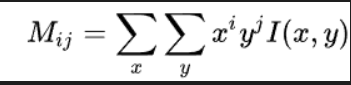

In [43]:
def Calc_img_Moment(img,p,q):
    """
    Calculates the image moment for our picture of interest
    """

    # not correct, centroid calc comes out wrong

    h, w = img.shape
    y, x = np.mgrid[0:h, 0:w]
    return np.sum((x**p) * (y**q) * img)

def Centroid(img):
    """
    The calculation of the centroid is done here.
    
    """

    M_10 = Calc_img_Moment(img,1,0)
    M_01 = Calc_img_Moment(img,0,1)

    M_00 = Calc_img_Moment(img,0,0) 

    return (M_10/M_00), (M_01/M_00)

In [44]:
img_source = r"..\Data\Raw\Bear.jpg"

img = cv.imread(img_source,2)

In [45]:
cx, cy = Centroid(img)
cx = int(round(cx))
cy = int(round(cy))
print(int(round(cx)), int(round(cy)))

223 169


In [46]:
# this code would be useful for us to see, by eye, if the image has calculated the correct centroid.

# Define the center coordinates, radius, color, and thickness
center_coordinates = (cx, cy)
radius = 1
colour = (255, 0, 0) # Blue color in BGR
thickness = 5

# Draw the circle
image = cv.circle(img, center_coordinates, radius, colour, thickness)

# Display the image
cv.imshow('Image with Circle', image)
cv.waitKey(0)
cv.destroyAllWindows()

In [47]:
# We want to put the centroid onto the image itself with the help of libraries.
print(img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [48]:
# we also seek to find a line through that said centroid, from which we will take further image moments accross each side.


# Quantify the Symmetry

from this we want to be looking for symmetries and to do this we will calculate the image moment of each section of the image and if it's symmetric we may find that the area would be the same and so their difference should be zero and the closer to zero the more symmetric the image is.

This important fact will be that later it will be important to find the range of values that will be considered acceptable.

In [ ]:
from skimage.draw import line
import numpy as np

# image size
h, w = I.shape

# pick endpoints far enough to cover the image
x0 = int(cx - np.cos(theta) * max(h, w))
y0 = int(cy - np.sin(theta) * max(h, w))
x1 = int(cx + np.cos(theta) * max(h, w))
y1 = int(cy + np.sin(theta) * max(h, w))

rr, cc = line(y0, x0, y1, x1)   # row, col indices of the line
